# PROBLEMA

Calcular a posição do ranking da Universidade Federal do Triângulo Mineiro (UFTM) no IGC (O Índice Geral de Cursos é um dos instrumentos utilizados para conhecer o desempenho das instituições de ensino superior do Brasil. O instrumento é construído com base numa média ponderada das notas dos cursos de graduação e pós-graduação de cada instituição.)

# DATASET

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/indicadores-de-qualidade-da-educacao-superior

In [1]:
# Importar dos módulos para análise dos dados
import pandas as pd
import numpy as np

# Importar dos módulos para plot
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

# Configurar as cores dos gráficos 
sn.set_style("whitegrid")
sn.set_palette('hls')

# Configurar o tamanho dos gráficos
import pylab
pylab.rcParams['figure.figsize'] = (14, 6)

In [2]:
# Carregar dataset

dados = pd.read_excel('IGC_2019.xlsx')

In [3]:
# Verificar os nomes das colunas do dataset

dados.columns

Index([' Ano', ' Código da IES', ' Nome da IES', ' Sigla da IES',
       ' Organização Acadêmica', ' Categoria Administrativa', ' Sigla da UF',
       ' Nº de Cursos com CPC no triênio', ' Alfa (Proporção de Graduação)',
       ' Conceito Médio de Graduação',
       ' Beta (Proporção de Mestrado - Equivalente)',
       ' Conceito Médio de Mestrado',
       ' Gama (Proporção de Doutorandos – Equivalente)',
       ' Conceito Médio do doutorado', ' IGC (Contínuo)', ' IGC (Faixa)',
       'TX_OBS'],
      dtype='object')

In [4]:
# Corrigir o nome das colunas do dataset

dados.columns = [str(cl).strip().replace(' ', '_') for cl in dados.columns]

In [5]:
# Verificar o nome dos índice do dataset

dados.index

RangeIndex(start=0, stop=2090, step=1)

In [6]:
# Verificar o tamanho do dataset

dados.shape

(2090, 17)

In [7]:
# Verificar os tipos da colunas do dataset

dados.dtypes

Ano                                                int64
Código_da_IES                                      int64
Nome_da_IES                                       object
Sigla_da_IES                                      object
Organização_Acadêmica                             object
Categoria_Administrativa                          object
Sigla_da_UF                                       object
Nº_de_Cursos_com_CPC_no_triênio                    int64
Alfa_(Proporção_de_Graduação)                    float64
Conceito_Médio_de_Graduação                      float64
Beta_(Proporção_de_Mestrado_-_Equivalente)       float64
Conceito_Médio_de_Mestrado                       float64
Gama_(Proporção_de_Doutorandos_–_Equivalente)    float64
Conceito_Médio_do_doutorado                      float64
IGC_(Contínuo)                                   float64
IGC_(Faixa)                                       object
TX_OBS                                           float64
dtype: object

In [8]:
# Verificar os tipos das colunas do dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ano                                            2090 non-null   int64  
 1   Código_da_IES                                  2090 non-null   int64  
 2   Nome_da_IES                                    2090 non-null   object 
 3   Sigla_da_IES                                   1774 non-null   object 
 4   Organização_Acadêmica                          2090 non-null   object 
 5   Categoria_Administrativa                       2090 non-null   object 
 6   Sigla_da_UF                                    2090 non-null   object 
 7   Nº_de_Cursos_com_CPC_no_triênio                2090 non-null   int64  
 8   Alfa_(Proporção_de_Graduação)                  2090 non-null   float64
 9   Conceito_Médio_de_Graduação                    2090 

In [9]:
# Verificar as quantidade de valores únicos do dataset

dados.nunique()

Ano                                                 1
Código_da_IES                                    2090
Nome_da_IES                                      2070
Sigla_da_IES                                     1548
Organização_Acadêmica                               5
Categoria_Administrativa                            6
Sigla_da_UF                                        27
Nº_de_Cursos_com_CPC_no_triênio                   103
Alfa_(Proporção_de_Graduação)                     337
Conceito_Médio_de_Graduação                      2071
Beta_(Proporção_de_Mestrado_-_Equivalente)        335
Conceito_Médio_de_Mestrado                        222
Gama_(Proporção_de_Doutorandos_–_Equivalente)     211
Conceito_Médio_do_doutorado                       123
IGC_(Contínuo)                                   2070
IGC_(Faixa)                                         6
TX_OBS                                              0
dtype: int64

In [10]:
# Verificar a análise estatística do dataset

dados.describe()

,Ano,Código_da_IES,Nº_de_Cursos_com_CPC_no_triênio,Alfa_(Proporção_de_Graduação),Conceito_Médio_de_Graduação,Beta_(Proporção_de_Mestrado_-_Equivalente),Conceito_Médio_de_Mestrado,Gama_(Proporção_de_Doutorandos_–_Equivalente),Conceito_Médio_do_doutorado,IGC_(Contínuo),TX_OBS
count,2090.0,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2070.000000,0.0
mean,2019.0,3993.786124,11.552632,0.965706,2.518601,0.016650,0.688261,0.008075,0.467571,2.576483,NaN
std,0.0,4856.797958,24.432640,0.133315,0.586723,0.062006,1.581838,0.038561,1.400808,0.580543,NaN
min,2019.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.749787,NaN
25%,2019.0,1144.500000,2.000000,1.000000,2.191516,0.000000,0.000000,0.000000,0.000000,2.209869,NaN
50%,2019.0,2044.000000,5.000000,1.000000,2.535201,0.000000,0.000000,0.000000,0.000000,2.549263,NaN
75%,2019.0,4106.250000,11.000000,1.000000,2.889558,0.000000,0.000000,0.000000,0.000000,2.922754,NaN
max,2019.0,23410.000000,713.000000,1.000000,4.302528,0.742991,5.000000,0.433298,5.000000,4.854888,NaN


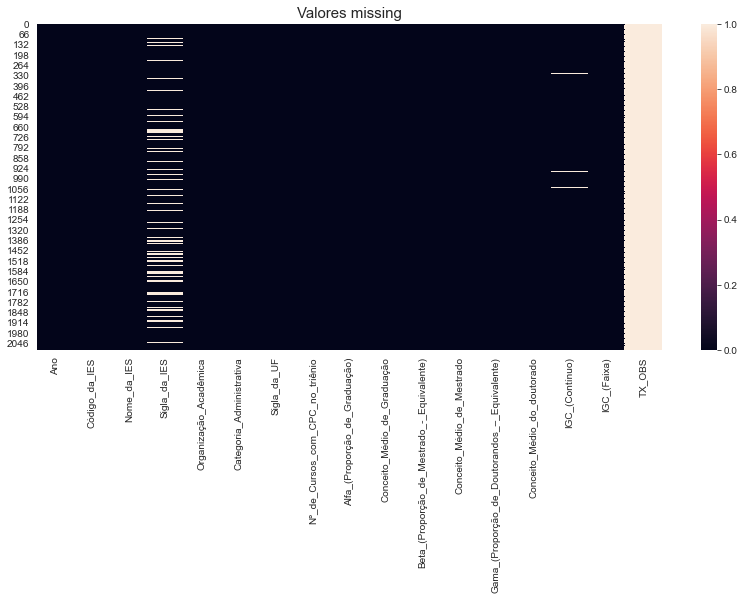

In [11]:
# Verificar os dados missing do dataset

fig, axs = plt.subplots()
sn.heatmap(dados.isnull(), ax=axs)
plt.title('Valores missing', fontsize = 15)
plt.show()

In [12]:
# Verificar os dados misssing do dataset

dados.isnull().sum()

Ano                                                 0
Código_da_IES                                       0
Nome_da_IES                                         0
Sigla_da_IES                                      316
Organização_Acadêmica                               0
Categoria_Administrativa                            0
Sigla_da_UF                                         0
Nº_de_Cursos_com_CPC_no_triênio                     0
Alfa_(Proporção_de_Graduação)                       0
Conceito_Médio_de_Graduação                         0
Beta_(Proporção_de_Mestrado_-_Equivalente)          0
Conceito_Médio_de_Mestrado                          0
Gama_(Proporção_de_Doutorandos_–_Equivalente)       0
Conceito_Médio_do_doutorado                         0
IGC_(Contínuo)                                     20
IGC_(Faixa)                                         0
TX_OBS                                           2090
dtype: int64

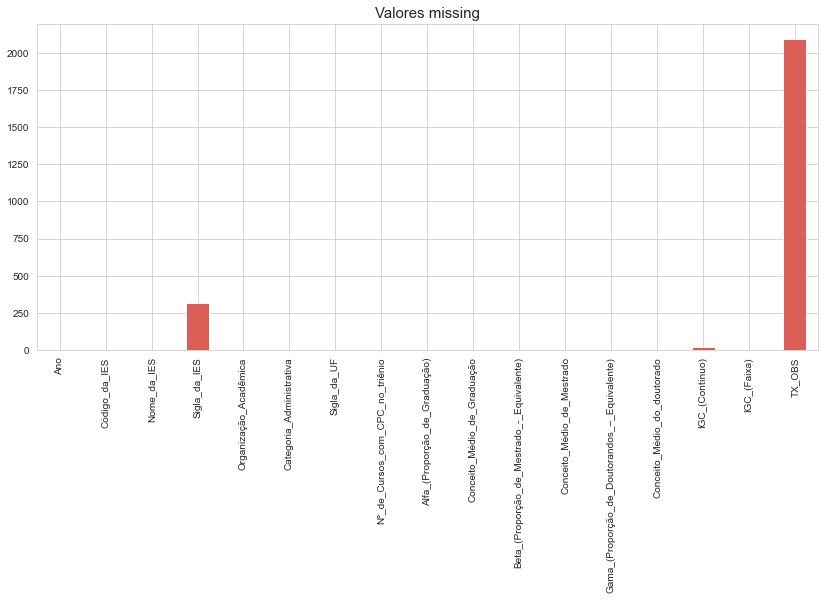

In [13]:
# Verificar os dados missing do dataset

fig, axs = plt.subplots()
dados.isnull().sum().plot(kind='bar')
plt.title('Valores missing', fontsize = 15)
plt.show()

In [14]:
# Verificar os dados de cada coluna do dataset

i = 0
for cl in dados.columns:
    i += 1
    lista = list(dados[cl].unique())
    if len(lista) > 30:
        lista = lista[0:15] + ['...'] + lista[-15:]
    print(i, cl)
    print('  ', lista)
    print()

1 Ano
   [2019]

2 Código_da_IES
   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, '...', 18874, 19252, 19337, 19500, 19501, 19512, 19578, 19588, 19739, 19861, 19862, 19863, 20478, 22015, 23410]

3 Nome_da_IES
   ['UNIVERSIDADE FEDERAL DE MATO GROSSO', 'UNIVERSIDADE DE BRASÍLIA', 'UNIVERSIDADE FEDERAL DE SERGIPE', 'UNIVERSIDADE FEDERAL DO AMAZONAS', 'UNIVERSIDADE FEDERAL DO PIAUÍ', 'UNIVERSIDADE FEDERAL DE OURO PRETO', 'UNIVERSIDADE FEDERAL DE SÃO CARLOS', 'UNIVERSIDADE FEDERAL DE VIÇOSA', 'UNIVERSIDADE ESTADUAL DE LONDRINA', 'PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ', 'UNIVERSIDADE CATÓLICA DE PERNAMBUCO', 'UNIVERSIDADE FEDERAL DO RIO GRANDE', 'UNIVERSIDADE DE CAXIAS DO SUL', 'UNIVERSIDADE DO VALE DO RIO DOS SINOS', 'UNIVERSIDADE CATÓLICA DE PETRÓPOLIS', '...', 'FACULDADE RAIMUNDO MARINHO DE PENEDO', 'Faculdade de Tecnologia Alpha Channel', 'FACULDADE UNIFAMETRO MARACANAÚ', 'Faculdade de Tecnologia de São Carlos', 'Faculdade de Tecnologia Sebrae', 'INSTITUTO MASTER DE ENSINO PR

In [15]:
# Verificar os dados do dataset

dados.head()

,Ano,Código_da_IES,Nome_da_IES,Sigla_da_IES,Organização_Acadêmica,Categoria_Administrativa,Sigla_da_UF,Nº_de_Cursos_com_CPC_no_triênio,Alfa_(Proporção_de_Graduação),Conceito_Médio_de_Graduação,Beta_(Proporção_de_Mestrado_-_Equivalente),Conceito_Médio_de_Mestrado,Gama_(Proporção_de_Doutorandos_–_Equivalente),Conceito_Médio_do_doutorado,IGC_(Contínuo),IGC_(Faixa),TX_OBS
0,2019,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Universidade,Pública Federal,MT,91,0.793355,2.924962,0.133805,4.299846,0.072840,4.676593,3.236518,4,NaN
1,2019,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,DF,87,0.524364,3.269586,0.232540,4.588441,0.243096,4.772640,3.941659,4,NaN
2,2019,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pública Federal,SE,90,0.801417,3.105500,0.121849,4.275261,0.076734,4.663607,3.367594,4,NaN
3,2019,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pública Federal,AM,75,0.848582,2.821851,0.102966,4.234367,0.048452,4.491420,3.048187,4,NaN
4,2019,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,Universidade,Pública Federal,PI,77,0.855083,2.713283,0.100234,4.309608,0.044683,4.668567,2.960657,4,NaN


In [16]:
# Verificar os dados do dataset

dados.tail()

,Ano,Código_da_IES,Nome_da_IES,Sigla_da_IES,Organização_Acadêmica,Categoria_Administrativa,Sigla_da_UF,Nº_de_Cursos_com_CPC_no_triênio,Alfa_(Proporção_de_Graduação),Conceito_Médio_de_Graduação,Beta_(Proporção_de_Mestrado_-_Equivalente),Conceito_Médio_de_Mestrado,Gama_(Proporção_de_Doutorandos_–_Equivalente),Conceito_Médio_do_doutorado,IGC_(Contínuo),IGC_(Faixa),TX_OBS
2085,2019,19862,Faculdade de Tecnologia Jorge Caram Sabbag,FATEC Bebedouro,Faculdade,Pública Estadual,SP,1,1.0,2.835660,0.0,0.0,0.0,0.0,2.835660,3,NaN
2086,2019,19863,Faculdade de Tecnologia de Assis,FATEC Assis,Faculdade,Pública Estadual,SP,1,1.0,2.525471,0.0,0.0,0.0,0.0,2.525471,3,NaN
2087,2019,20478,Faculdade de Tecnologia de Santana de Parnaíba,FATEC-SPB,Faculdade,Pública Estadual,SP,1,1.0,2.512686,0.0,0.0,0.0,0.0,2.512686,3,NaN
2088,2019,22015,Faculdade Municipal de Educação e Meio Ambiente,FAMA,Faculdade,Pública Municipal,PR,1,1.0,2.292900,0.0,0.0,0.0,0.0,2.292900,3,NaN
2089,2019,23410,UNIVERSIDADE ESTADUAL DA REGIÃO TOCANTINA DO M...,UEMASUL,Universidade,Pública Estadual,MA,4,1.0,1.544614,0.0,0.0,0.0,0.0,1.544614,2,NaN


In [17]:
# Verificar os dados do dataset

dados.sample(5)

,Ano,Código_da_IES,Nome_da_IES,Sigla_da_IES,Organização_Acadêmica,Categoria_Administrativa,Sigla_da_UF,Nº_de_Cursos_com_CPC_no_triênio,Alfa_(Proporção_de_Graduação),Conceito_Médio_de_Graduação,Beta_(Proporção_de_Mestrado_-_Equivalente),Conceito_Médio_de_Mestrado,Gama_(Proporção_de_Doutorandos_–_Equivalente),Conceito_Médio_do_doutorado,IGC_(Contínuo),IGC_(Faixa),TX_OBS
1944,2019,15032,UNIVERSIDADE ALTO VALE DO RIO DO PEIXE,UNIARP,Universidade,Privada sem fins lucrativos,SC,25,0.956150,2.977197,0.043850,4.000000,0.000000,0.000000,3.022046,4,NaN
389,2019,785,FACULDADE DE EDUCAÇÃO DE TANGARÁ DA SERRA,NaN,Faculdade,Privada com fins lucrativos,MT,1,1.000000,2.066125,0.000000,0.000000,0.000000,0.000000,2.066125,3,NaN
1320,2019,3029,FACULDADE DA AMAZÔNIA,FAAM,Faculdade,Privada com fins lucrativos,PA,3,1.000000,1.941158,0.000000,0.000000,0.000000,0.000000,1.941158,2,NaN
148,2019,322,UNIVERSIDADE PAULISTA,UNIP,Universidade,Privada com fins lucrativos,SP,713,0.997956,2.698285,0.001114,4.670918,0.000930,4.776667,2.702415,3,NaN
525,2019,1153,UNIVERSIDADE CÂNDIDO MENDES,UCAM,Universidade,Privada sem fins lucrativos,RJ,53,0.977818,2.200316,0.019166,4.052536,0.003016,4.500000,2.242751,3,NaN


In [18]:
# Verificar a quantidade de dados nulos do dataset

len(dados[dados['IGC_(Contínuo)'].isnull()])

20

In [19]:
# Verificar os dados nulos do dataset

dados[dados['IGC_(Contínuo)'].isnull()]

,Ano,Código_da_IES,Nome_da_IES,Sigla_da_IES,Organização_Acadêmica,Categoria_Administrativa,Sigla_da_UF,Nº_de_Cursos_com_CPC_no_triênio,Alfa_(Proporção_de_Graduação),Conceito_Médio_de_Graduação,Beta_(Proporção_de_Mestrado_-_Equivalente),Conceito_Médio_de_Mestrado,Gama_(Proporção_de_Doutorandos_–_Equivalente),Conceito_Médio_do_doutorado,IGC_(Contínuo),IGC_(Faixa),TX_OBS
321,2019,651,FACULDADE DE ADMINISTRAÇÃO DE GOVERNADOR VALAD...,FAGV,Faculdade,Privada sem fins lucrativos,MG,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
352,2019,708,INSTITUTO DE CIÊNCIAS SOCIAIS APLICADAS,UNEB,Faculdade,Privada sem fins lucrativos,DF,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
465,2019,1034,UNIÃO DE ESCOLAS SUPERIORES DA FUNESO,UNESF,Faculdade,Privada sem fins lucrativos,PE,5,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
488,2019,1072,FACULDADE AFIRMATIVO,FAFI,Faculdade,Privada com fins lucrativos,MT,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
716,2019,1501,FACULDADE LATINO AMERICANA DE EDUCAÇÃO,FLATED,Faculdade,Privada sem fins lucrativos,CE,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
796,2019,1628,FACULDADE DE CIÊNCIAS HUMANAS DE AGUAÍ,FACHA,Faculdade,Privada com fins lucrativos,SP,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
949,2019,1865,Faculdade Alvorada Paulista,FALP,Faculdade,Privada com fins lucrativos,SP,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
1051,2019,2075,INSTITUTO DE ENSINO SUPERIOR DE ALAGOAS,IESA,Faculdade,Privada com fins lucrativos,AL,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
1214,2019,2566,INSTITUTO DE ENSINO SUPERIOR DE OLINDA,IESO,Faculdade,Privada com fins lucrativos,PE,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN
1304,2019,2927,FACULDADE DE BELO HORIZONTE,FDR,Faculdade,Privada com fins lucrativos,MG,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,SC,NaN


In [20]:
# Excluir os dados nulos do dataset

dados = dados[dados['IGC_(Contínuo)'].isnull() == False]

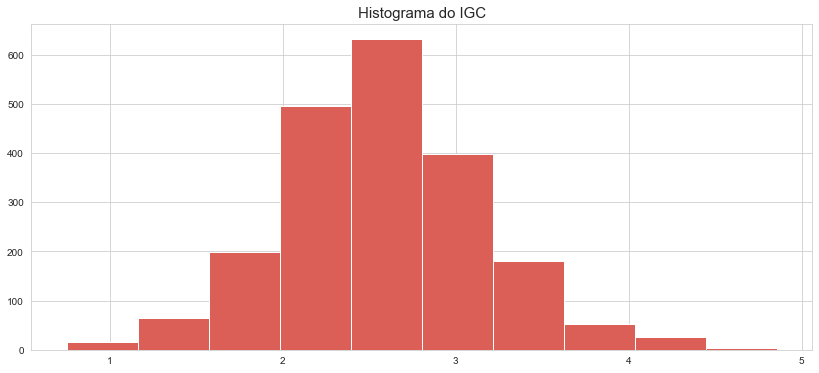

In [21]:
# Verificar o histograma

fig, axs = plt.subplots()
dados['IGC_(Contínuo)'].hist()
plt.title('Histograma do IGC', fontsize = 15)
plt.show()

In [22]:
# Verificar o valor da assimetria

dados['IGC_(Contínuo)'].skew()

0.2526760834273679

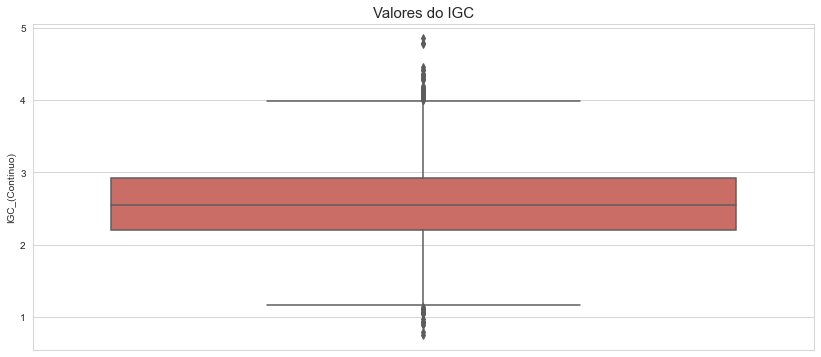

In [23]:
# Análise gráfica

fig, axs = plt.subplots()
sn.boxplot(y='IGC_(Contínuo)', data=dados, ax=axs)
plt.title('Valores do IGC', fontsize = 15)
plt.show()

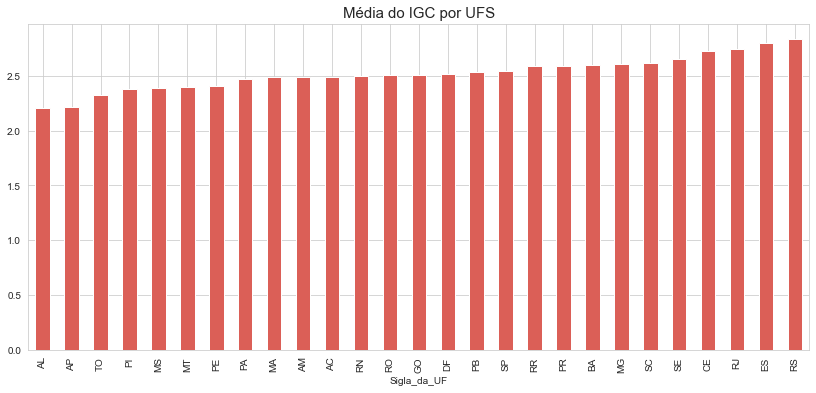

In [24]:
# Análise gráfica

fig, axs = plt.subplots()
dados.groupby('Sigla_da_UF')['IGC_(Contínuo)'].mean().sort_values().plot(kind='bar')
plt.title('Média do IGC por UFS', fontsize = 15)
plt.show()

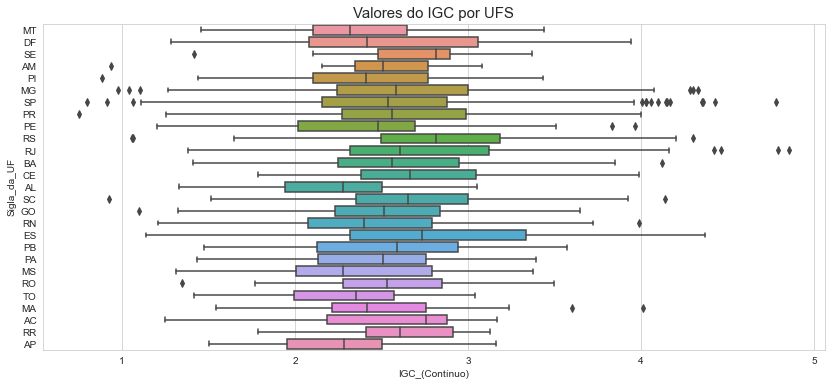

In [25]:
# Análise gráfica

fig, axs = plt.subplots()
sn.boxplot(x='IGC_(Contínuo)', y='Sigla_da_UF', data=dados)
plt.title('Valores do IGC por UFS', fontsize = 15)
plt.show()

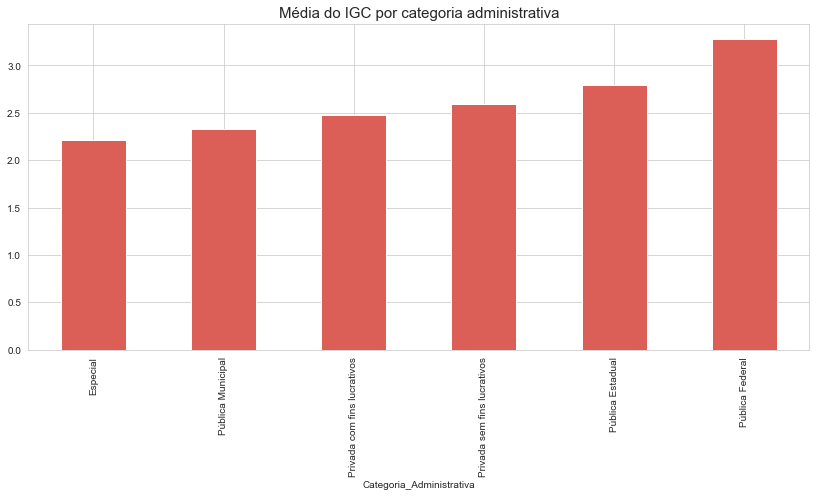

In [26]:
# Análise gráfica

fig, axs = plt.subplots()
dados.groupby('Categoria_Administrativa')['IGC_(Contínuo)'].mean().sort_values().plot(kind="bar")
plt.title('Média do IGC por categoria administrativa', fontsize = 15)
plt.show()

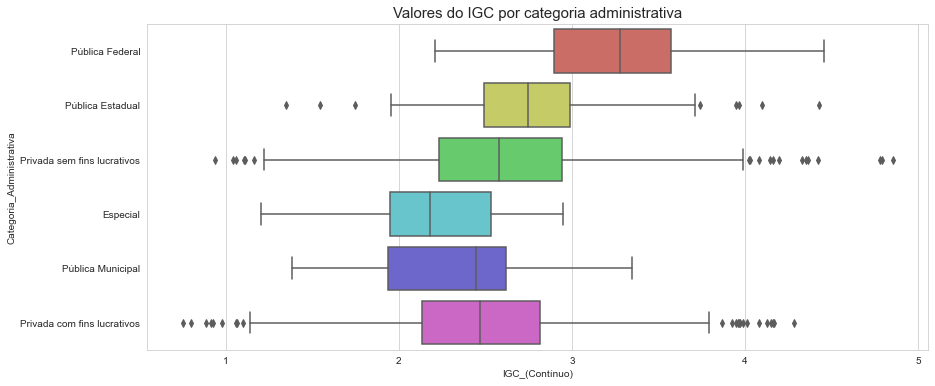

In [27]:
# Análise gráfica

fig, axs = plt.subplots()
sn.boxplot(x='IGC_(Contínuo)', y='Categoria_Administrativa', data=dados)
plt.title('Valores do IGC por categoria administrativa', fontsize = 15)
plt.show()

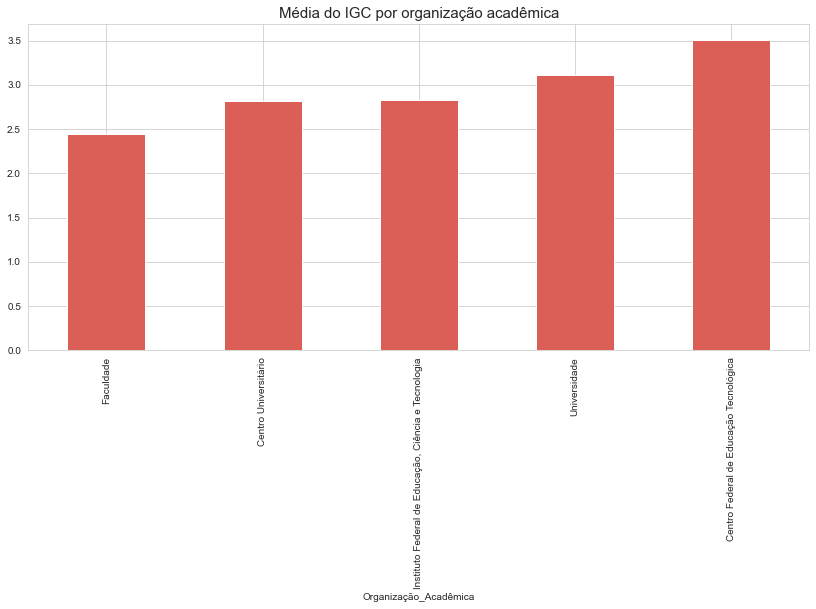

In [28]:
# Análise gráfica

fig, axs = plt.subplots()
dados.groupby('Organização_Acadêmica')['IGC_(Contínuo)'].mean().sort_values().plot(kind='bar')
plt.title('Média do IGC por organização acadêmica', fontsize = 15)
plt.show()

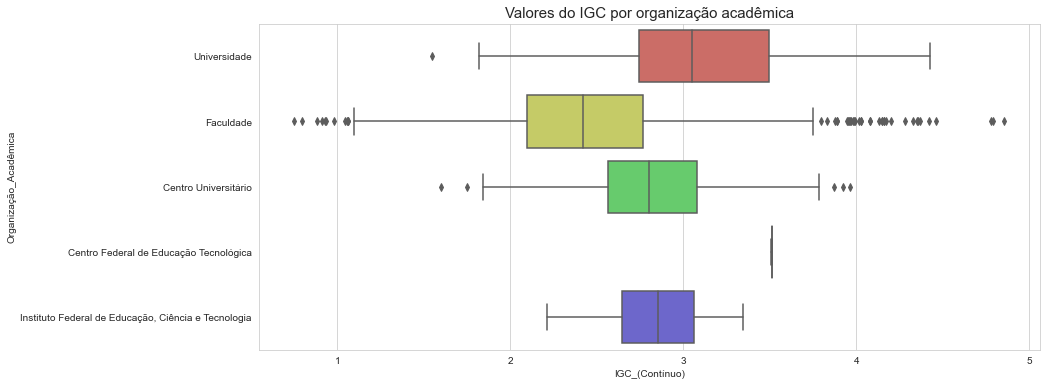

In [29]:
# Análise gráfica

fig, axs = plt.subplots()
sn.boxplot(x='IGC_(Contínuo)', y='Organização_Acadêmica', data=dados)
plt.title('Valores do IGC por organização acadêmica', fontsize = 15)
plt.show()

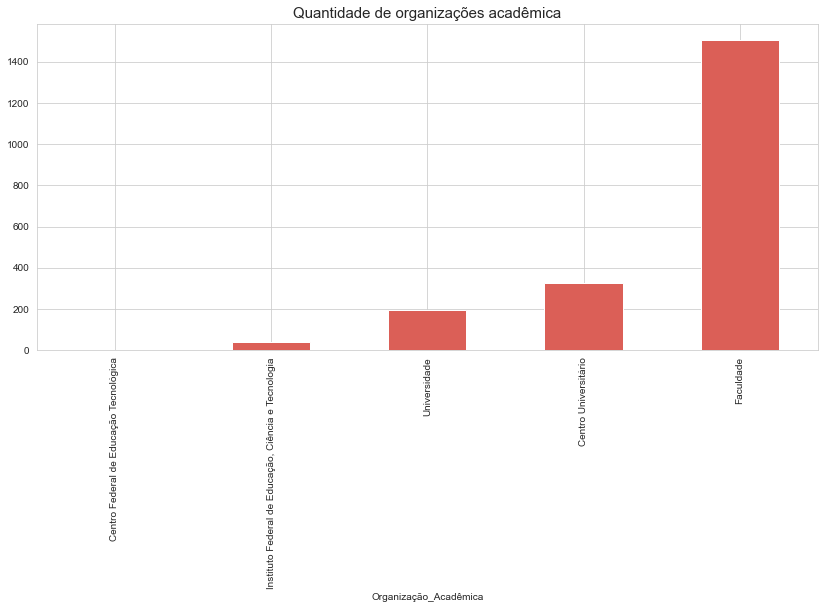

In [30]:
# Análise gráfica

fig, axs = plt.subplots()
dados.groupby('Organização_Acadêmica')['IGC_(Contínuo)'].count().sort_values().plot(kind='bar')
plt.title('Quantidade de organizações acadêmica', fontsize = 15)
plt.show()

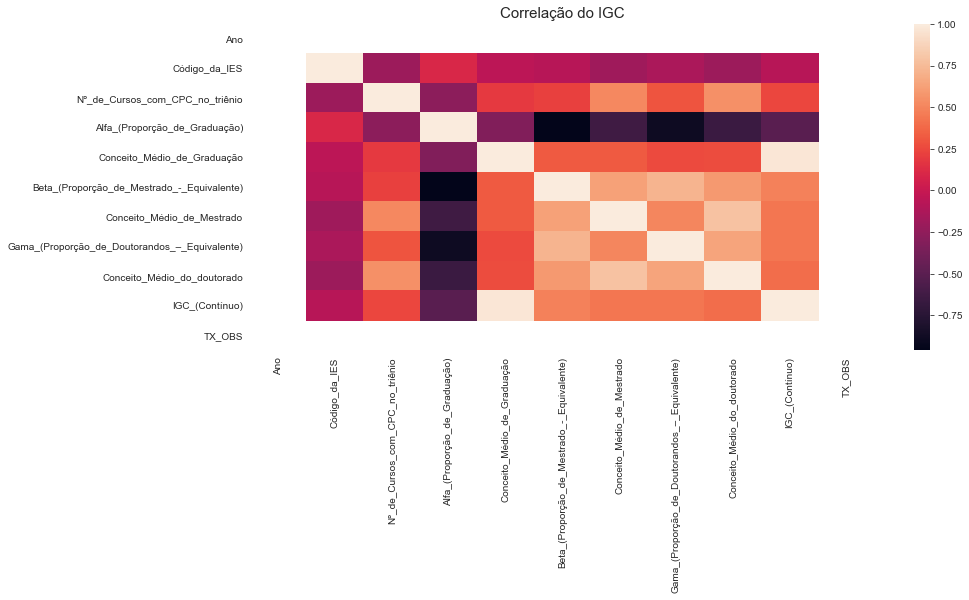

In [31]:
# Análise gráfica

fig, axs = plt.subplots()
sn.heatmap(dados.corr())
plt.title('Correlação do IGC', fontsize = 15)
plt.show()

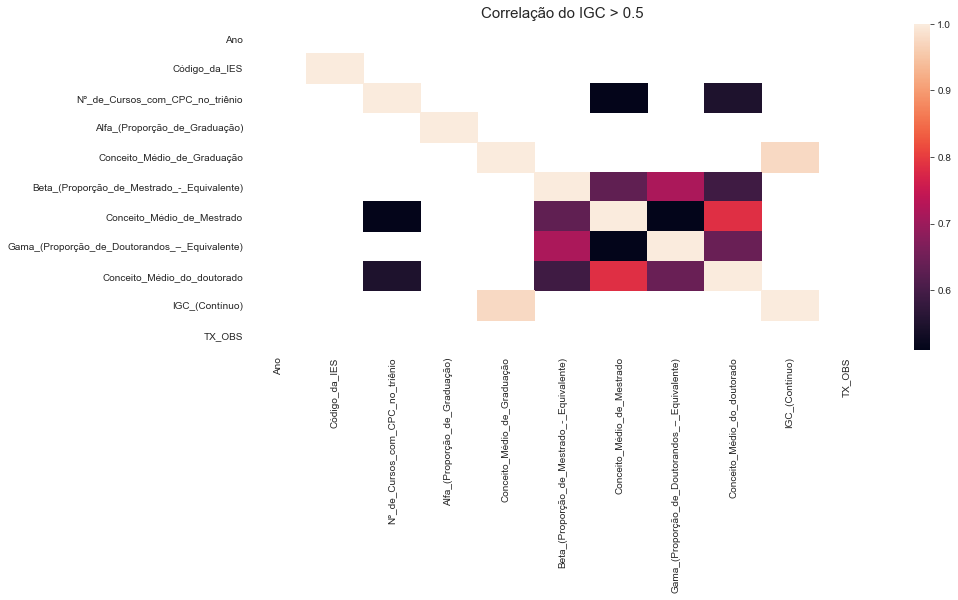

In [32]:
# Análise gráfica

x = dados.corr()
x = x[ x > 0.5]

fig, axs = plt.subplots()
sn.heatmap(x)
plt.title('Correlação do IGC > 0.5', fontsize = 15)
plt.show()

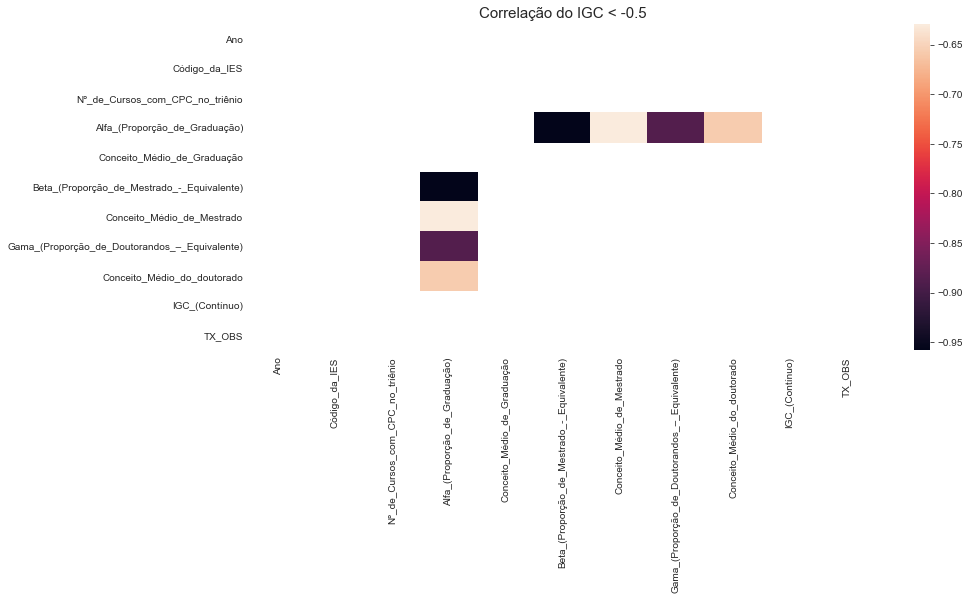

In [33]:
# Análise gráfica

x = dados.corr()
x = x[ x < -0.5]

fig, axs = plt.subplots()
sn.heatmap(x)
plt.title('Correlação do IGC < -0.5', fontsize = 15)
plt.show()

In [34]:
def ranking(dados, campo, parametros):
    """FUNÇÃO PARA FILTRAR O DATASET E PEGAR A POSIÇÃO DA LINHA (RANKING)
    ENTRA
        DATASET, CAMPO E PARAMETROS DO FILTRO
    SAI
        MÉDIA, NOTA E A POSIÇÃO DO RANKING"""
    
    filtro = dados.query('{0} in {1}'.format(campo, parametros)).copy()
    filtro.sort_values('IGC_(Contínuo)', ascending = False, inplace = True)
    filtro.reset_index(drop='index', inplace=True)
    
    media = filtro['IGC_(Contínuo)'].mean()
    nota = filtro[filtro['Código_da_IES'] == 597]['IGC_(Contínuo)'].values[0]
    
    ranking_pos = filtro[filtro['Código_da_IES'] == 597].index[0] + 1
    
    return round(media, 4), round(nota, 4), ranking_pos  

In [35]:
# PESQUISAR O RANKING NO NÍVEL DAS INSTITUIÇÕES PÚBLICAS

tbranking = []

tbranking.append(ranking(dados, 'Categoria_Administrativa', ['Pública Federal']))
tbranking.append(ranking(dados, 'Categoria_Administrativa', ['Pública Federal', 'Pública Estadual', 'Pública Municipal']))

pd.DataFrame(tbranking, columns = ['Média', 'Nota', 'Posição'], index = ['Pública', 'Pública Federal'])

,Média,Nota,Posição
Pública,3.2778,3.5493,30
Pública Federal,2.9400,3.5493,41


In [36]:
# PESQUISAR O RANKING NO NÍVEL DAS INSTITUIÇÕES PÚBLICAS POR UFS

tbranking = []

ddf = dados[dados['Categoria_Administrativa'] == 'Pública Federal']

tbranking.append(ranking(ddf, 'Sigla_da_UF', ['MG']))
tbranking.append(ranking(ddf, 'Sigla_da_UF', ['MG', 'SP', 'RJ', 'ES']))
tbranking.append(ranking(ddf, 'Sigla_da_UF', list(ddf['Sigla_da_UF'].unique())))

pd.DataFrame(tbranking, columns = ['Média', 'Nota', 'Posição'], index = ['Estadual', 'Região', 'Brasil'])

,Média,Nota,Posição
Estadual,3.4505,3.5493,6
Região,3.5281,3.5493,15
Brasil,3.2778,3.5493,30


In [37]:
# PESQUISAR O RANKING NO NÍVEL DAS UFS

tbranking = []

tbranking.append(ranking(dados, 'Sigla_da_UF', ['MG']))
tbranking.append(ranking(dados, 'Sigla_da_UF', ['MG', 'SP', 'RJ', 'ES']))
tbranking.append(ranking(dados, 'Sigla_da_UF', list(dados['Sigla_da_UF'].unique())))

pd.DataFrame(tbranking, columns = ['Média', 'Nota', 'Posição'], index = ['Estadual', 'Regional', 'Brasil'])

,Média,Nota,Posição
Estadual,2.6142,3.5493,10
Regional,2.6077,3.5493,65
Brasil,2.5765,3.5493,112
